In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
with open('/Users/georg/Projects/Tiny Games in Python/tic_tac_toe/tic_tac_toe/results/Q-Learning Agent_vs_Minimax Agent.txt', 'r', encoding='utf-8') as file:
    results_text = file.read()

In [10]:
# Each line in results_text is a game result, split by commas
game_rows = [game.split(',') for game in results_text.splitlines()]
for idx, row in enumerate(game_rows):
    game_rows[idx] = [val.strip() for val in row]  # Strip whitespace from each value
# Create a DataFrame, assuming each row has the same number of columns
df = pd.DataFrame(game_rows)
df.columns = ['Game', 'Rounds', 'Init Turn', 'Winner', 'Result', 'Mean Time X', 'Mean Time O']  # Set column names
df.head()

,Game,Rounds,Init Turn,Winner,Result,Mean Time X,Mean Time O
0,0,5,X,Minimax Agent,O,0.0,18.0
1,1,9,O,None,Draw,0.0,91.8
2,2,7,O,Minimax Agent,O,0.0,112.75
3,3,8,X,Minimax Agent,O,0.0,13.0
4,4,6,X,Minimax Agent,O,0.0,15.0


In [11]:
df['Rounds'] = pd.to_numeric(df['Rounds'], errors='coerce')  # Convert 'Rounds' to numeric, handling errors
df['Mean Time X'] = pd.to_numeric(df['Mean Time X'], errors='coerce')  # Convert 'Mean Time X' to numeric, handling errors
df['Mean Time O'] = pd.to_numeric(df['Mean Time O'], errors='coerce')  # Convert 'Mean Time O' to numeric, handling errors
df = df.dropna(subset=['Rounds', 'Mean Time X', 'Mean Time O'])  # Drop rows with NaN in these columns

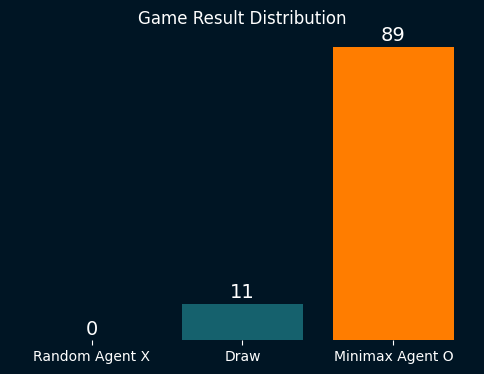

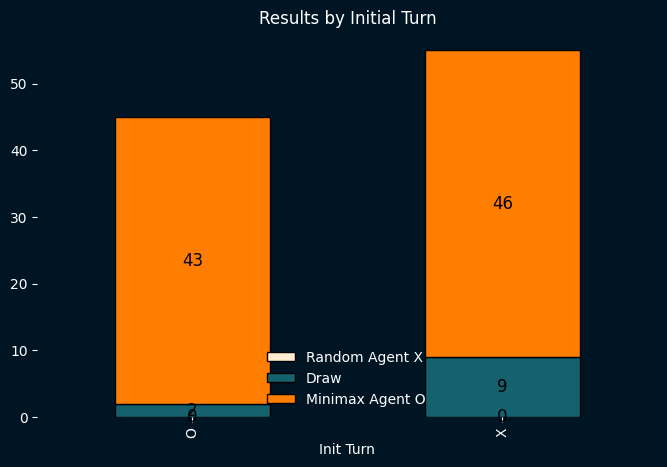

In [15]:
# 1. Gesamte Siege/Draws visualisieren (Dark Theme)
plt.style.use('dark_background')
# Mapping for x-axis labels
x_labels = ['Random Agent X', 'Draw', 'Minimax Agent O']
result_map = {'X': 'Random Agent X', 'Draw': 'Draw', 'O': 'Minimax Agent O'}
result_counts = df['Result'].map(result_map).value_counts().reindex(x_labels, fill_value=0)
fig1, ax1 = plt.subplots(figsize=(6, 4))
fig1.patch.set_facecolor('#001524')
ax1.set_facecolor('#001524')
bars = ax1.bar(result_counts.index, result_counts.values, color=['#ffecd1', '#15616d', '#ff7d00'])  # X = gelb
ax1.set_title('Game Result Distribution')

ax1.set_ylabel('')
ax1.set_yticks([])

# Entferne die weißen Rahmen (Spines)
for spine in ax1.spines.values():
    spine.set_visible(False)

# Werte an die Balken schreiben
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f'{int(height)}', ha='center', va='bottom', color='white', fontsize=14)

plt.show()

# 2. Siege/Draws nach Init Turn (Dark Theme)
init_turn_results = df.groupby(['Init Turn', 'Result']).size().unstack(fill_value=0).reindex(columns=['X', 'Draw', 'O'])
# Rename columns for x-axis
init_turn_results = init_turn_results.rename(columns=result_map)
fig2, ax2 = plt.subplots(figsize=(8, 5))
fig2.patch.set_facecolor('#001524')
ax2.set_facecolor('#001524')
init_turn_results.plot(
    kind='bar',
    stacked=True,
    color=['#ffecd1', '#15616d', '#ff7d00'],  # X = gelb
    ax=ax2,
    edgecolor='black'
)
ax2.set_title('Results by Initial Turn')
plt.style.use('dark_background')

ax2.legend(
    loc='center left',  # Position innerhalb der Achse
    bbox_to_anchor=(0.35, 0.1),  # (x, y) in Achsenkoordinaten (0–1)
    frameon=False,
    labelcolor='white',
    facecolor='#001524'
)

# Entferne die weißen Rahmen (Spines)
for spine in ax2.spines.values():
    spine.set_visible(False)

# Werte an die Balken schreiben (gestapelt)
for container in ax2.containers:
    ax2.bar_label(container, label_type='center', color='black', fontsize=12)

plt.show()

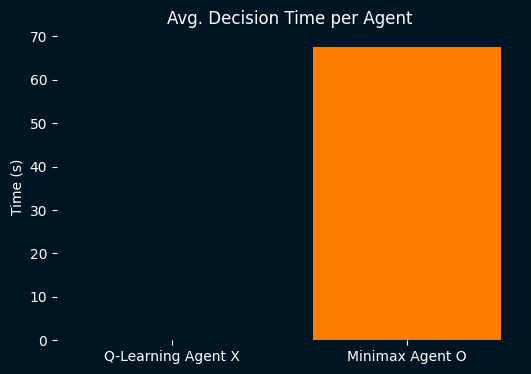

In [13]:
# Stil setzen
plt.style.use('dark_background')

# Durchschnittliche Entscheidungszeit berechnen
avg_times = {
    'Q-Learning Agent X': df['Mean Time X'].mean(),
    'Minimax Agent O': df['Mean Time O'].mean()
}

# Plot vorbereiten
fig, ax = plt.subplots(figsize=(6, 4))
fig.patch.set_facecolor('#001524')
ax.set_facecolor('#001524')

# Balken zeichnen
bars = ax.bar(avg_times.keys(), avg_times.values(), color=['#ffecd1', '#ff7d00'])

# Titel und Achsenbeschriftungen
ax.set_title('Avg. Decision Time per Agent', color='white')
ax.set_ylabel('Time (s)', color='white')
ax.tick_params(colors='white')

# Spines entfernen
for spine in ax.spines.values():
    spine.set_visible(False)

plt.show()


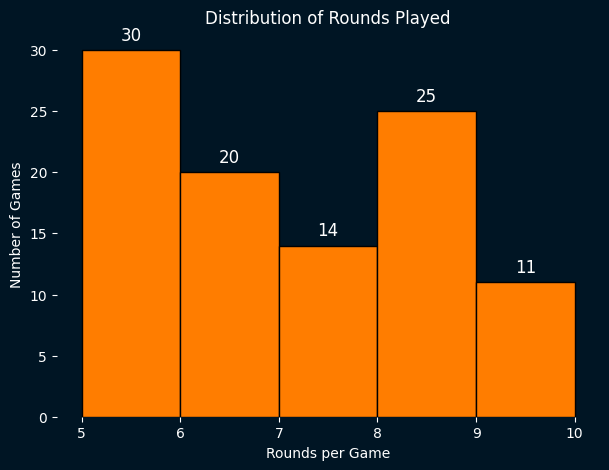

In [14]:
import matplotlib.pyplot as plt

plt.style.use('dark_background')

# Beispielhafte Spalte – ggf. anpassen!
rounds_col = 'Rounds'  # oder wie deine Spalte heißt

fig, ax = plt.subplots(figsize=(7, 5))
fig.patch.set_facecolor('#001524')
ax.set_facecolor('#001524')

# Histogramm erzeugen
bins = range(df[rounds_col].min(), df[rounds_col].max() + 2)  # z. B. 5–10
n, bins, patches = ax.hist(df[rounds_col], bins=bins, color='#ff7d00', edgecolor='black')

# Titel und Achsen
ax.set_title('Distribution of Rounds Played', color='white')
ax.set_xlabel('Rounds per Game', color='white')
ax.set_ylabel('Number of Games', color='white')
ax.tick_params(colors='white')

# Spines entfernen
for spine in ax.spines.values():
    spine.set_visible(False)

# Werte über den Balken anzeigen
for patch, value in zip(patches, n):
    ax.text(patch.get_x() + patch.get_width() / 2, value + 0.5, f'{int(value)}',
            ha='center', va='bottom', color='white', fontsize=12)

plt.show()
